In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

places_to_visit = pd.read_csv("~/Nextcloud/Note/Viaggi/praga_da_vedere.csv")
# Example data (replace with your own)
places: list[str] = places_to_visit["name"].tolist()

coordinates: dict[str, tuple[float, float]] = {row["name"]: (row.long, row.lat) for _, row in places_to_visit.iterrows()}

Optimal Route: ['Hostel One Míru', 'Museo nazionale', 'Statua Equestre di San Venceslao', 'Wenceslas Square', 'Jindřišská věž', 'Sinagoga del Giubileo', 'Porta delle Polveri', 'Obecní Dům', 'Celetná', 'Chiesa di Santa Maria di Týn', 'House at the Golden Ring', 'Týnská', 'Piazza della Città Vecchia', 'Orologio astronomico di Praga', 'Malé Námesti', 'Church of St Giles', 'Beer Museum', 'Rotunda Nalezení sv. Kříže', 'Krannerova kašna', 'Ponte della Legione', 'Ponte Carlo', 'Giardini Wallenstein', 'South Gardens of Prague Castle', 'Thunovská', 'Nový Svět', 'Convento di Loreto', 'Strahov', 'Piazza Hradcany', 'Nerudova', 'Duomo di Praga', 'Castello di Praga', 'Column of the Holy Trinity', 'Chiesa di San Nicola', 'Malostranské nám.', 'Torre Bassa Del Ponte Della Città Piccola', 'Muro di Lennon', 'Čertovka', 'Museum Kampa', 'Teatro Nazionale di Praga', 'Casa danzante', 'Basilica dei Santi Pietro e Paolo', 'Vyšehrad', 'Lucerna Passage', 'Testa di Franz Kafka', 'Kostel svatého Martina ve zdi', '

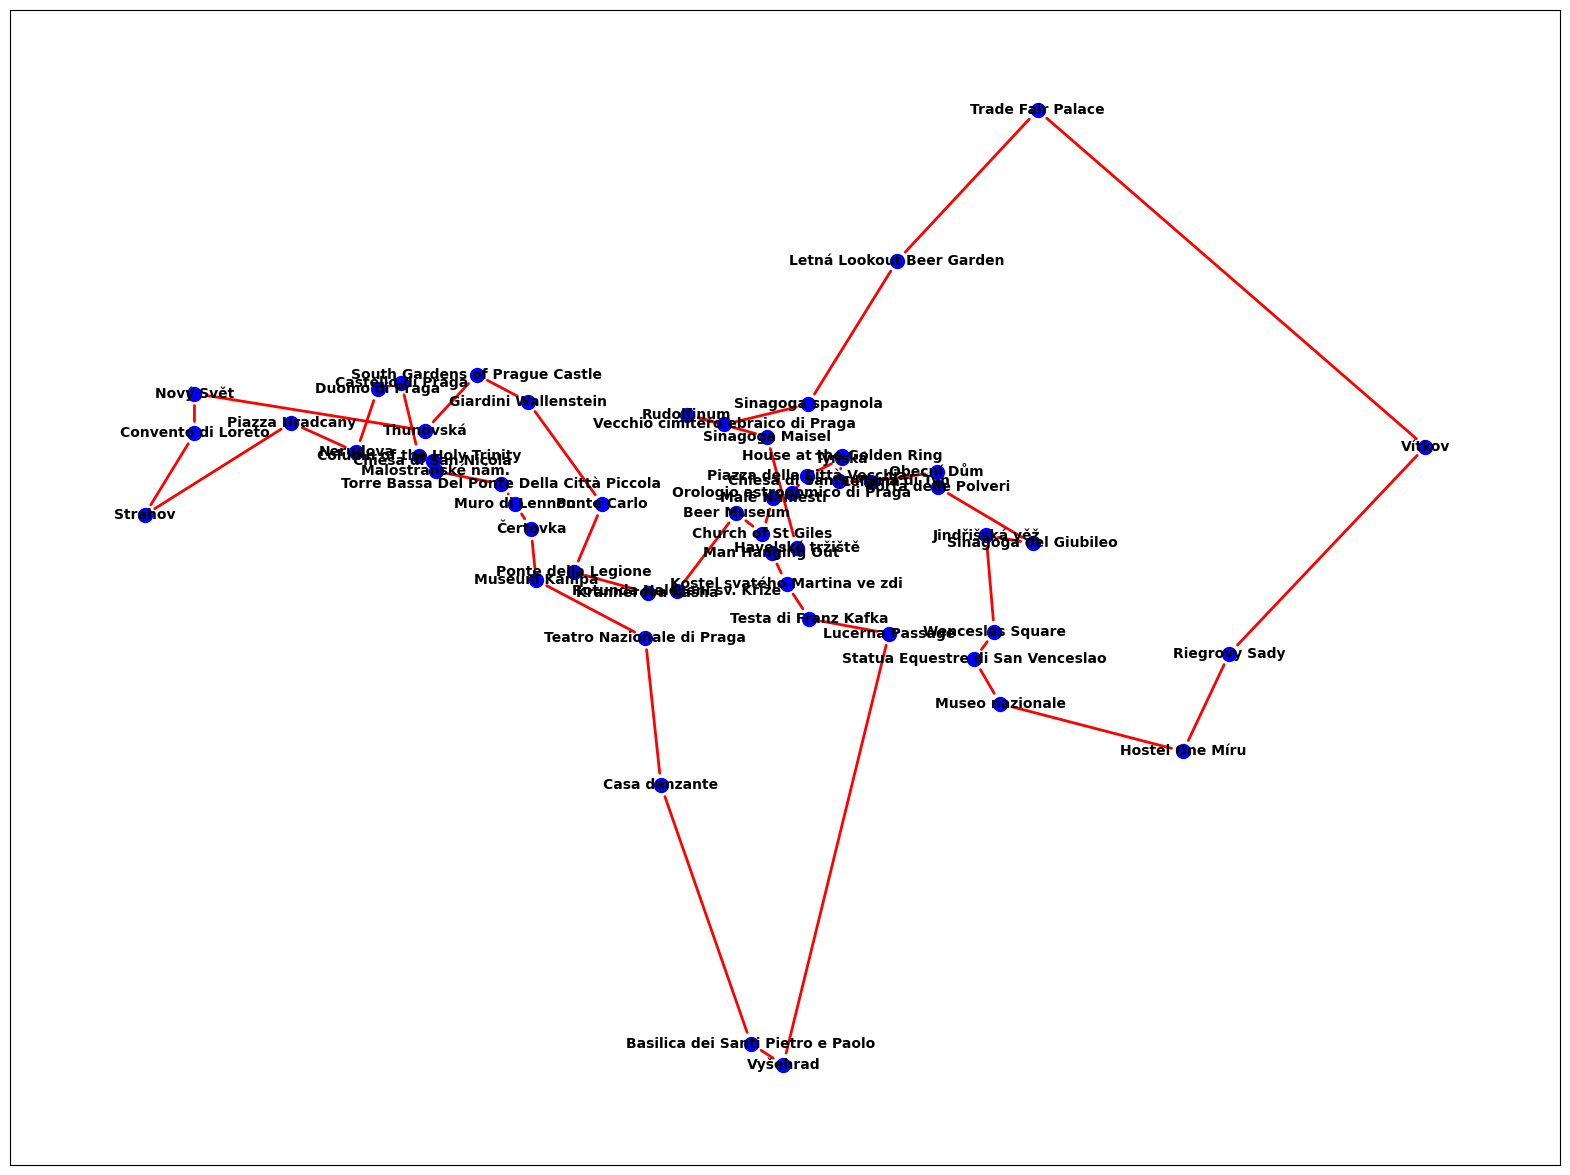

In [2]:
# Create a graph
G = nx.Graph()

# Add nodes with coordinates
for place in places:
    G.add_node(place, pos=coordinates[place])

# Add edges with distances (assuming Euclidean distance for simplicity)
for i in range(len(places)):
    for j in range(i + 1, len(places)):
        dist = ((coordinates[places[i]][0] - coordinates[places[j]][0]) ** 2 +
                (coordinates[places[i]][1] - coordinates[places[j]][1]) ** 2) ** 0.5
        G.add_edge(places[i], places[j], weight=dist)

# Solve the TSP
tsp_path = nx.approximation.traveling_salesman_problem(G, cycle=True)

# Print the optimal route
print("Optimal Route:", tsp_path)
fig, ax = plt.subplots(figsize=(20, 15))
# Create a subgraph with only the selected edges
selected_edges = [(tsp_path[i], tsp_path[i + 1]) for i in range(len(tsp_path) - 1)]
selected_subgraph = G.subgraph(tsp_path + [tsp_path[0]])  # Add the last edge to complete the cycle

# Plot the graph with nodes and selected edges
pos = nx.get_node_attributes(G, 'pos')
nx.draw_networkx_nodes(G, pos, node_size=100, node_color='blue', ax=ax)
nx.draw_networkx_edges(G, pos, edgelist=selected_edges, edge_color='red', width=2, arrows=True, ax=ax)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black', font_weight='bold', ax=ax)
plt.show()


In [4]:
with open("/home/paolo/Nextcloud/Note/Viaggi/Itinerario Praga.md", "w") as f:
    f.writelines([f"- [ ] {path}\n" for i, path in enumerate(tsp_path)])